In [272]:
import afqinsight as ai 
import numpy as np
import matplotlib.pyplot as plt

In [261]:
X, groups, feature_names, subjects, classes = ai.load_afq_data('/home/jovyan/data', unsupervised=True)

In [249]:
X.shape

(641, 7200)

In [250]:
len(groups)

72

In [253]:
len(feature_names) # 4* 18* 100

7200

In [254]:
set([1,2,3,4,5,5,5,5,5,6,6,7])

{1, 2, 3, 4, 5, 6, 7}

### 4 features

In [266]:
feature =[]
for i in range(len(feature_names)):
    feature.append(feature_names[i][0])
print(set(feature))   

{'dti_md', 'dki_md', 'dki_fa', 'dti_fa'}


### 18 bundles in order 

In [267]:
bundles =[]
for i in range(len(feature_names)):
    bundles.append(feature_names[i][1])
print(set(bundles))

{'ILF_L', 'IFO_L', 'CGC_L', 'UNC_L', 'FA', 'CGC_R', 'ATR_L', 'CST_L', 'FP', 'ARC_R', 'IFO_R', 'ILF_R', 'SLF_R', 'UNC_R', 'SLF_L', 'ARC_L', 'CST_R', 'ATR_R'}


### Extract data of dki_fa and dki_md for all subjects

In [165]:
index_fa = []
for i in range(len(feature_names)):
    if feature_names[i][0] == 'dki_fa':
        index_fa.append(i)
index_md = []
for i in range(len(feature_names)):
    if feature_names[i][0] == 'dki_md':
        index_md.append(i)

In [166]:
X_dki_fa = X[:, index_fa]
X_dki_md = X[:, index_md]
X_dki_fa.shape

(641, 1800)

Text(0.5, 1.0, 'ILF_L for 10 subjects')

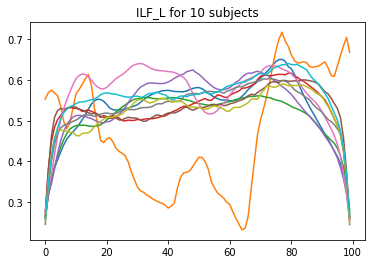

In [271]:
plt.plot(X_dki_fa[0:10, 0:100].T)
plt.title("ILF_L for 10 subjects")

# take avg of each bundle for dki_fa

In [204]:

node_avg = np.zeros((len(X_dki_fa), 18))
for j in range(len(X_dki_fa)):
    for i in range(18):
        node_avg[j, i] = np.mean(X_dki_fa[j, (i*100):(i*100+100)])

In [205]:
node_avg.shape


(641, 18)

Text(0.5, 0, '18 bundles')

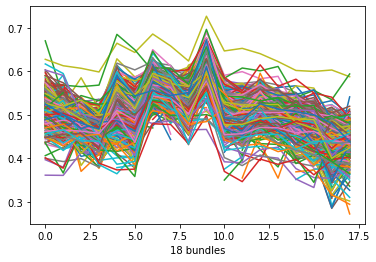

In [206]:
plt.plot(node_avg[:, :].T)
plt.xlabel('18 bundles')

In [207]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
node_avg_imp = imputer.fit_transform(node_avg)

In [208]:
from sklearn.decomposition import NMF
model = NMF(n_components=2,init='random', random_state=0)
W = model.fit_transform(node_avg_imp)
H = model.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [209]:
W.shape
#H.shape

(641, 2)

In [210]:
W[0, :]@H

array([0.55108171, 0.53036643, 0.52077902, 0.50036124, 0.55122868,
       0.5234022 , 0.60955509, 0.58688216, 0.56645158, 0.64469768,
       0.53966573, 0.52925475, 0.54358685, 0.53222706, 0.51591975,
       0.50543676, 0.46674208, 0.46931278])

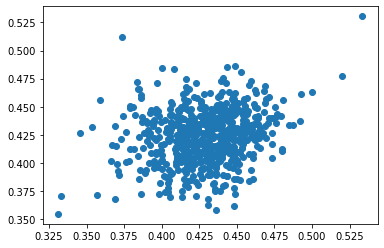

In [211]:
fig, ax = plt.subplots()
ax.scatter(W[:, 0], W[:, 1], color = age)
# add age as color


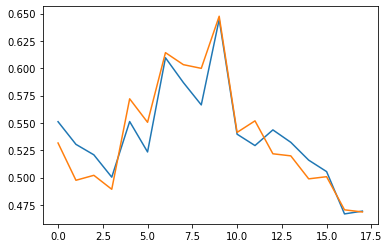

In [212]:
fig, ax = plt.subplots()
ax.plot(W[0, :]@H)
ax.plot(node_avg_imp[0, :])

Text(0.5, 1.0, '')

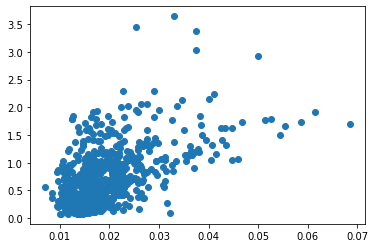

In [240]:
loss_nmf = []
loss_pca = []
for i in range(641):
    loss_nmf.append(np.sqrt(np.mean(((W[i, :]@H)-node_avg_imp[i, :])**2)))
    loss_pca.append(np.sqrt(np.mean(((x[i, :]@c)-node_avg_imp[i, :])**2)))
fig1, ax1 = plt.subplots()
ax1.scatter(loss_nmf, loss_pca)

ax1.title
# compare loss b/w nmp & pca, scatterplot loss of these two

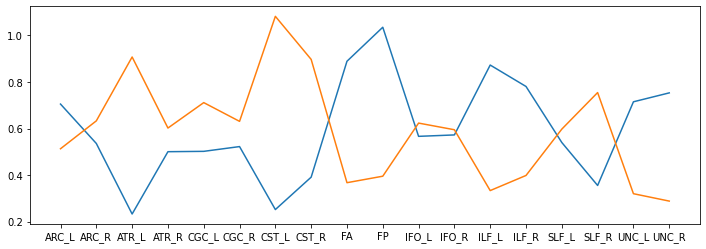

In [202]:
fig, ax = plt.subplots()
ax.plot(H.T)
ax.set_xticks(range(18))
ax.set_xticklabels(['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R'])
fig.set_size_inches([12, 4])

In [178]:
from sklearn.decomposition import NMF
model_3 = NMF(n_components=3,init='random', random_state=0)
W = model_3.fit_transform(node_avg_imp)
H_3 = model_3.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


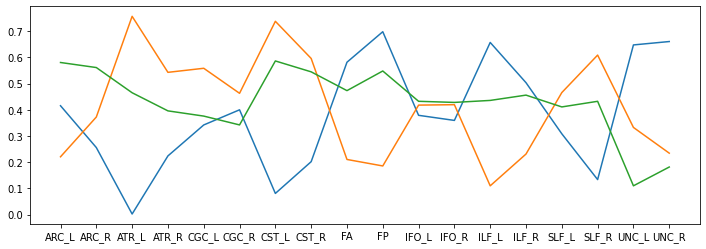

In [179]:
fig, ax = plt.subplots()
ax.plot(H_3.T)
ax.set_xticks(range(18))
ax.set_xticklabels(['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R'])
fig.set_size_inches([12, 4])

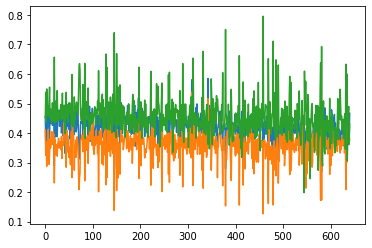

In [180]:
plt.plot(W)

# take avg of each bundle for dki_md


In [181]:
node_avg1 = np.zeros((len(X_dki_md), 18))
for j in range(len(X_dki_md)):
    for i in range(18):
        node_avg1[j, i] = np.mean(X_dki_md[j, (i*100):(i*100+100)])

In [182]:
node_avg1.shape

(641, 18)

In [186]:
node_avg1_imp = imputer.fit_transform(node_avg1)

PCA with 2 components

In [235]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA(n_components=2)
node_avg_imp_nor = scaler.fit_transform(node_avg_imp)
x = pca.fit_transform(node_avg_imp_nor)


In [236]:
c = pca.components_

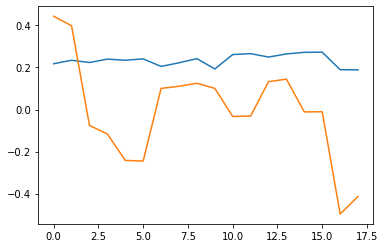

In [237]:
fig, ax = plt.subplots()
ax.plot(c.T)

In [238]:
x.shape

(641, 2)

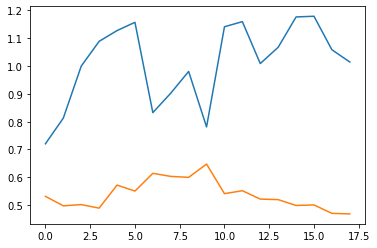

In [239]:
fig, ax = plt.subplots()
ax.plot(x[0, :]@c)
ax.plot(node_avg_imp[0, :])

In [ ]:
plt.scatter(x[:, 0], x[:, 1])

PCA with 3 components

In [134]:
pca_3 = PCA(n_components=3)

x_3 = pca_3.fit_transform(node_avg_imp_nor)

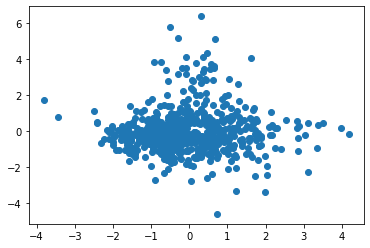

In [135]:
plt.scatter(x_3[:, 2], x_3[:, 1])

Pearson correlation

In [151]:
ARC_L_0 = np.array(X_dki_fa[0, 0:100])
ARC_R_0 = np.array(X_dki_fa[0, 100:200])
pho_0 = np.corrcoef(ARC_L_0, ARC_R_0 )
print(pho_0)

[[1.         0.72044336]
 [0.72044336 1.        ]]


In [220]:
avg_bundle = []
for i in range(18):
    avg_bundle.append(np.mean(node_avg_imp[:, 0]))
avg_bundle1 = []
for i in range(18):
    avg_bundle1.append(np.mean(node_avg1_imp[:, 0]))

In [218]:
node_avg_imp.shape

(641, 18)

In [221]:
pho_measures = np.corrcoef(node_avg_imp.T)

In [222]:
print(pho_measures)

[[1.         0.75692862 0.45361571 0.40137252 0.36575108 0.33926258
  0.4743449  0.46878236 0.56407917 0.43530708 0.52458664 0.50159837
  0.57768691 0.57724494 0.62510652 0.54140224 0.1243675  0.22677021]
 [0.75692862 1.         0.45627341 0.491948   0.36621346 0.42465818
  0.49455726 0.56654371 0.56860781 0.4039256  0.52484053 0.56044618
  0.58027388 0.65540514 0.60619908 0.69630171 0.18135548 0.26319291]
 [0.45361571 0.45627341 1.         0.7592408  0.45720155 0.42936286
  0.50141244 0.42848121 0.49162248 0.33726274 0.53588427 0.50642682
  0.50860299 0.47459725 0.56969906 0.50150144 0.41757684 0.46404093]
 [0.40137252 0.491948   0.7592408  1.         0.48387335 0.54401688
  0.45829281 0.4970494  0.55755002 0.3642981  0.5586539  0.59702914
  0.51140877 0.55465694 0.58501573 0.59909777 0.43794662 0.5089084 ]
 [0.36575108 0.36621346 0.45720155 0.48387335 1.         0.81827328
  0.50239035 0.51260203 0.45548267 0.41173542 0.57522901 0.59157336
  0.44923903 0.50921216 0.63366659 0.6314318

In [223]:
pho_measures.shape

(18, 18)

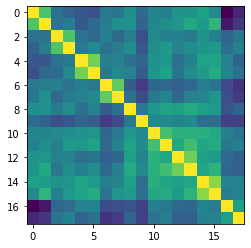

In [224]:
plt.imshow(pho_measures) # correlation between 18 bundles in fa

In [227]:
import seaborn as sns
import pandas as pd

In [229]:
node_avg_imp_df = pd.DataFrame(node_avg_imp, columns = ['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R'])

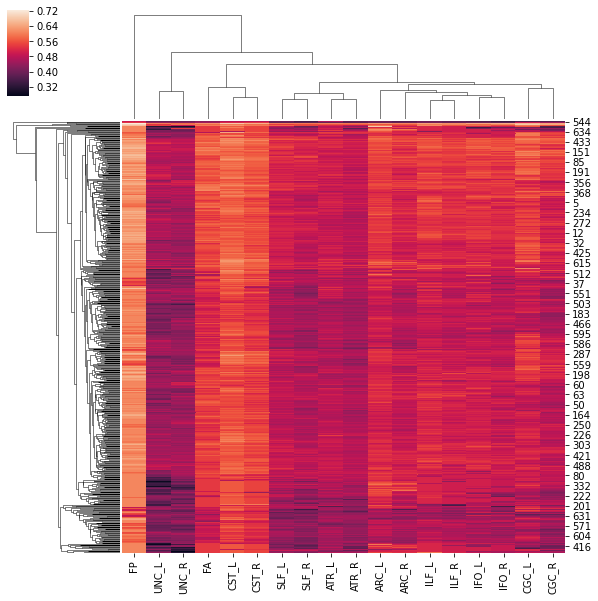

In [230]:

sns.clustermap(node_avg_imp_df)


In [231]:
node_avg_imp_md = pd.DataFrame(node_avg1_imp, columns = ['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R'])

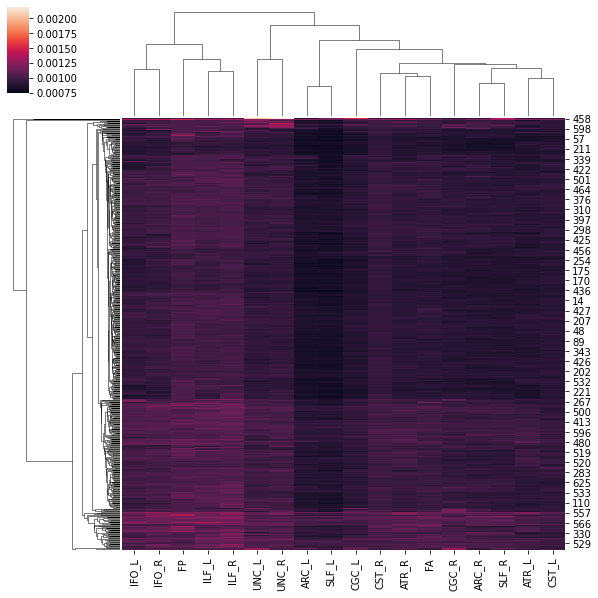

In [232]:
sns.clustermap(node_avg_imp_md)

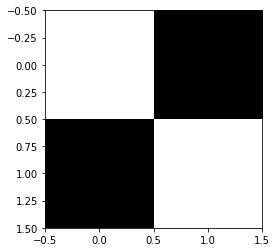

In [199]:
pho_measures_ARC_L = np.corrcoef(np.array(node_avg_imp[:, 0]), np.array(node_avg1_imp[:, 0]))
plt.imshow(pho_measures_ARC_L, cmap = 'gray')
            

In [196]:
np.array(node_avg_imp[:, 0]).shape

(641,)